In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import pickle

from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, LSTM, TimeDistributed, InputLayer, Reshape, BatchNormalization, Bidirectional

In [2]:
# metadata = pd.read_csv("/datasets/nicolas_facchinetti/img_data/emodb_df.csv")
metadata = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data//emodb/metadata_final.csv")
metadata

,path,filename,chunk,label,actor,gender,mod
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m,0
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m,1
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m,1
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m,1
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m,1
...,...,...,...,...,...,...,...
4151,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,0,angry,16,f,1
4152,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,0,angry,16,f,2
4153,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,0,angry,16,f,2
4154,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,0,angry,16,f,2


In [3]:
data = pickle.load(open("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/emodb/processed_data.p", "rb" ))
data['x'].shape, data['y'].shape

((4156, 261, 128, 1), (4156, 5))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# get train/test dataframe
train_df, test_df = train_test_split(metadata, 
                                   test_size = 0.1, 
                                   random_state = 1997,
                                   stratify = metadata['label'])

In [6]:
train_df

,path,filename,chunk,label,actor,gender,mod
158,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a05Wa.wav,0,angry,3,m,2
2230,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,12b02Ad.wav,0,fear,12,m,2
2260,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,12b02Wb.wav,0,angry,12,m,2
1631,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,11a04Nd.wav,0,neutral,11,m,0
3476,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,15b02Aa.wav,0,fear,15,m,2
...,...,...,...,...,...,...,...
354,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03b09Nc.wav,0,neutral,3,m,1
959,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,08b10Wa.wav,0,angry,8,f,1
2991,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,14a07Aa.wav,0,fear,14,f,2
673,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,08a07Wc.wav,0,angry,8,f,2


In [7]:
test_df

,path,filename,chunk,label,actor,gender,mod
3626,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,15b10Nb.wav,0,neutral,15,m,0
4071,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b09Ab.wav,0,fear,16,f,1
1934,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,11b03Wa.wav,0,angry,11,m,2
461,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,08a02Ac.wav,0,fear,8,f,1
405,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03b10Wb.wav,0,angry,3,m,0
...,...,...,...,...,...,...,...
359,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03b09Nc.wav,0,neutral,3,m,2
1289,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,10a02Ab.wav,0,fear,10,m,1
661,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,08a07Tb.wav,0,sad,8,f,2
1031,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,09a05Tb.wav,0,sad,9,f,1


In [8]:
train_df.index, test_df.index

(Int64Index([ 158, 2230, 2260, 1631, 3476, 3693, 1510,   76, 2469, 3351,
             ...
             3153, 1199, 3423, 2760, 2329,  354,  959, 2991,  673, 1386],
            dtype='int64', length=3740),
 Int64Index([3626, 4071, 1934,  461,  405, 1903, 3960,  495,   90,  616,
             ...
             2106, 4047,  481, 2880, 3127,  359, 1289,  661, 1031, 2142],
            dtype='int64', length=416))

In [10]:
import matplotlib.pyplot as plt

def plot_res_acc(h, x, y):
    plt.subplot(x, 2, y)
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
def plot_res_loss(h, x, y):
    plt.subplot(x, 2, y)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
def plot_stats(h):
    fig = plt.gcf()
    fig.set_size_inches(15, 15)
    for num, c in enumerate(h):
        n = (num+1)*2
        plot_res_acc(c, len(h), n-1)
        plot_res_loss(c, len(h), n)
    plt.show()

In [11]:
def train_evaluate(model_fn, train, val, opt='adam'):
    m = model_fn()
    m.compile(loss='categorical_crossentropy', optimizer=opt, metrics='accuracy')
    # fit & predict
    history = m.fit(train[0], train[1],
                    epochs=30,
                    validation_data=(val[0], val[1]),
                    verbose=1)
    print("Done")
    return history

In [12]:
cat = metadata["label"].unique()
cat

array(['happy', 'neutral', 'sad', 'angry', 'fear'], dtype=object)

In [13]:
def train_kfold(kf, metadata, model_fn, x, y):
    results = []
    for train_index, val_index in kf:
        x_train = x[train_index]
        y_train = y[train_index]
        x_test = x[val_index]
        y_test = y[val_index]
        
        results.append(train_evaluate(model_fn, (x_train, y_train), (x_test, y_test)))
    return results

# Models

In [6]:
def get_m12():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(8, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(16, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(1, return_sequences=False, dropout=0.2),
            
            Dense(5, activation='softmax')
    ])
    return m

get_m12().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 25, 124, 8)     208       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 9, 25, 124, 8)     32        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 9, 12, 62, 8)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 9, 10, 60, 16)     1168      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 9, 9, 59, 16)      0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 9, 8496)           0

In [15]:
t1 = train_kfold(kf, metadata, get_m12, data['x'], data['y'])

Epoch 1/30
122/122 [==============================] - 51s 229ms/step - loss: 1.6071 - accuracy: 0.2089 - val_loss: 1.6242 - val_accuracy: 0.0733
Epoch 2/30
122/122 [==============================] - 15s 120ms/step - loss: 1.6039 - accuracy: 0.2400 - val_loss: 1.6110 - val_accuracy: 0.2784
Epoch 3/30
122/122 [==============================] - 15s 124ms/step - loss: 1.6019 - accuracy: 0.2441 - val_loss: 1.6029 - val_accuracy: 0.2784
Epoch 4/30
122/122 [==============================] - 15s 124ms/step - loss: 1.6012 - accuracy: 0.2441 - val_loss: 1.5971 - val_accuracy: 0.2784
Epoch 5/30
122/122 [==============================] - 15s 122ms/step - loss: 1.6007 - accuracy: 0.2441 - val_loss: 1.5971 - val_accuracy: 0.2784
Epoch 6/30
122/122 [==============================] - 15s 125ms/step - loss: 1.6005 - accuracy: 0.2441 - val_loss: 1.5942 - val_accuracy: 0.2784
Epoch 7/30
122/122 [==============================] - 15s 124ms/step - loss: 1.6004 - accuracy: 0.2441 - val_loss: 1.5964 - val_ac

KeyboardInterrupt: 

In [ ]:
plot_stats(t1)

In [21]:
t1 = train_evaluate(get_m12,
                    (data['x'][train_df.index], data['y'][train_df.index]),
                    (data['x'][test_df.index], data['y'][test_df.index]))

Epoch 1/30
111/111 [==============================] - 19s 149ms/step - loss: 1.6070 - accuracy: 0.2412 - val_loss: 1.6048 - val_accuracy: 0.2468
Epoch 2/30
111/111 [==============================] - 14s 125ms/step - loss: 1.6035 - accuracy: 0.2463 - val_loss: 1.6020 - val_accuracy: 0.2468
Epoch 3/30
111/111 [==============================] - 14s 127ms/step - loss: 1.6017 - accuracy: 0.2463 - val_loss: 1.6008 - val_accuracy: 0.2468
Epoch 4/30
111/111 [==============================] - 14s 125ms/step - loss: 1.6006 - accuracy: 0.2463 - val_loss: 1.6000 - val_accuracy: 0.2468
Epoch 5/30
111/111 [==============================] - 14s 125ms/step - loss: 1.6001 - accuracy: 0.2463 - val_loss: 1.5996 - val_accuracy: 0.2468
Epoch 6/30
111/111 [==============================] - 14s 127ms/step - loss: 1.5999 - accuracy: 0.2463 - val_loss: 1.5995 - val_accuracy: 0.2468
Epoch 7/30
111/111 [==============================] - 14s 128ms/step - loss: 1.5998 - accuracy: 0.2463 - val_loss: 1.5993 - val_ac

In [ ]:
def get_m13():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(8, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(16, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(1, return_sequences=False, dropout=0.2),
            
            Dense(5, activation='softmax')
    ])
    return m

get_m13().summary()

In [8]:
def get_m13():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(3, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m13().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 9, 11, 61, 16)     0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 9, 9, 59, 32)      4640      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 9, 4, 29, 32)      0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 9, 2, 27, 64)      1

In [9]:
m = get_m13()

m.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
# fit & predict
history = m.fit(data['x'][train_df.index], data['y'][train_df.index],
                epochs=30,
                batch_size=32,
                validation_data=(data['x'][test_df.index], data['y'][test_df.index]),
                verbose=1)


Epoch 1/30
111/111 [==============================] - 31s 221ms/step - loss: 1.6048 - accuracy: 0.2455 - val_loss: 1.6014 - val_accuracy: 0.2468
Epoch 2/30
111/111 [==============================] - 26s 232ms/step - loss: 1.6011 - accuracy: 0.2463 - val_loss: 1.6009 - val_accuracy: 0.2468
Epoch 3/30
111/111 [==============================] - 22s 197ms/step - loss: 1.6009 - accuracy: 0.2421 - val_loss: 1.6008 - val_accuracy: 0.2468
Epoch 4/30
111/111 [==============================] - 24s 217ms/step - loss: 1.5984 - accuracy: 0.2548 - val_loss: 1.5989 - val_accuracy: 0.2147
Epoch 5/30
111/111 [==============================] - 23s 209ms/step - loss: 1.3544 - accuracy: 0.4312 - val_loss: 1.7562 - val_accuracy: 0.2308
Epoch 6/30
111/111 [==============================] - 35s 314ms/step - loss: 1.1678 - accuracy: 0.5277 - val_loss: 2.0541 - val_accuracy: 0.2179
Epoch 7/30
111/111 [==============================] - 29s 259ms/step - loss: 1.0955 - accuracy: 0.5524 - val_loss: 1.6334 - val_ac

In [9]:
def get_m13():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
        
            TimeDistributed(Conv2D(16, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(3, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m13().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 9, 11, 61, 16)     0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 9, 9, 59, 32)      4640      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 9, 4, 29, 32)      0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 9, 2, 27, 64)      1

In [10]:
m = get_m13()

m.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')
# fit & predict
history = m.fit(data['x'][train_df.index], data['y'][train_df.index],
                epochs=30,
                batch_size=32,
                validation_data=(data['x'][test_df.index], data['y'][test_df.index]),
                verbose=1)


Epoch 1/30
117/117 [==============================] - 27s 182ms/step - loss: 1.6049 - accuracy: 0.2388 - val_loss: 1.6008 - val_accuracy: 0.2452
Epoch 2/30
117/117 [==============================] - 21s 175ms/step - loss: 1.6005 - accuracy: 0.2465 - val_loss: 1.6004 - val_accuracy: 0.2452
Epoch 3/30
117/117 [==============================] - 22s 189ms/step - loss: 1.6001 - accuracy: 0.2465 - val_loss: 1.6005 - val_accuracy: 0.2452
Epoch 4/30
117/117 [==============================] - 24s 204ms/step - loss: 1.6001 - accuracy: 0.2465 - val_loss: 1.6000 - val_accuracy: 0.2452
Epoch 5/30
117/117 [==============================] - 24s 205ms/step - loss: 1.5999 - accuracy: 0.2465 - val_loss: 1.5999 - val_accuracy: 0.2452
Epoch 6/30
117/117 [==============================] - 24s 207ms/step - loss: 1.6000 - accuracy: 0.2465 - val_loss: 1.5999 - val_accuracy: 0.2452
Epoch 7/30
117/117 [==============================] - 28s 236ms/step - loss: 1.6000 - accuracy: 0.2465 - val_loss: 1.6000 - val_ac

KeyboardInterrupt: 

In [104]:
def get_m13():
    m = Sequential([
            InputLayer(input_shape=(256,256,3)),
            Reshape((16,16,256,3)),
            TimeDistributed(Conv2D(16, kernel_size=(3,3), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),

            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(8, dropout=0.4, return_sequences=True),
            LSTM(4, return_sequences=False),
            
            Dense(7, activation='softmax')
    ])
    return m

get_m13().summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_28 (Reshape)         (None, 16, 16, 256, 3)    0         
_________________________________________________________________
time_distributed_234 (TimeDi (None, 16, 14, 254, 16)   448       
_________________________________________________________________
time_distributed_235 (TimeDi (None, 16, 14, 254, 16)   64        
_________________________________________________________________
time_distributed_236 (TimeDi (None, 16, 7, 127, 16)    0         
_________________________________________________________________
time_distributed_237 (TimeDi (None, 16, 5, 125, 32)    4640      
_________________________________________________________________
time_distributed_238 (TimeDi (None, 16, 4, 124, 32)    0         
_________________________________________________________________
time_distributed_239 (TimeDi (None, 16, 2, 122, 64)  

In [107]:
t2 = train_kfold(kf, metadata, get_m13)

Found 5610 validated image filenames belonging to 7 classes.
Found 572 validated image filenames belonging to 7 classes.
Epoch 1/30
88/88 [==============================] - 13s 127ms/step - loss: 1.8897 - accuracy: 0.2829 - val_loss: 1.8167 - val_accuracy: 0.3199
Epoch 2/30
88/88 [==============================] - 11s 119ms/step - loss: 1.7214 - accuracy: 0.3659 - val_loss: 1.6494 - val_accuracy: 0.3217
Epoch 3/30
88/88 [==============================] - 11s 119ms/step - loss: 1.6167 - accuracy: 0.3686 - val_loss: 2.1958 - val_accuracy: 0.1154
Epoch 4/30
88/88 [==============================] - 11s 120ms/step - loss: 1.5874 - accuracy: 0.3967 - val_loss: 1.5470 - val_accuracy: 0.3584
Epoch 5/30
88/88 [==============================] - 11s 120ms/step - loss: 1.5042 - accuracy: 0.4272 - val_loss: 1.7336 - val_accuracy: 0.2430
Epoch 6/30
88/88 [==============================] - 11s 120ms/step - loss: 1.5003 - accuracy: 0.4441 - val_loss: 1.7129 - val_accuracy: 0.2815
Epoch 7/30
88/88 [===

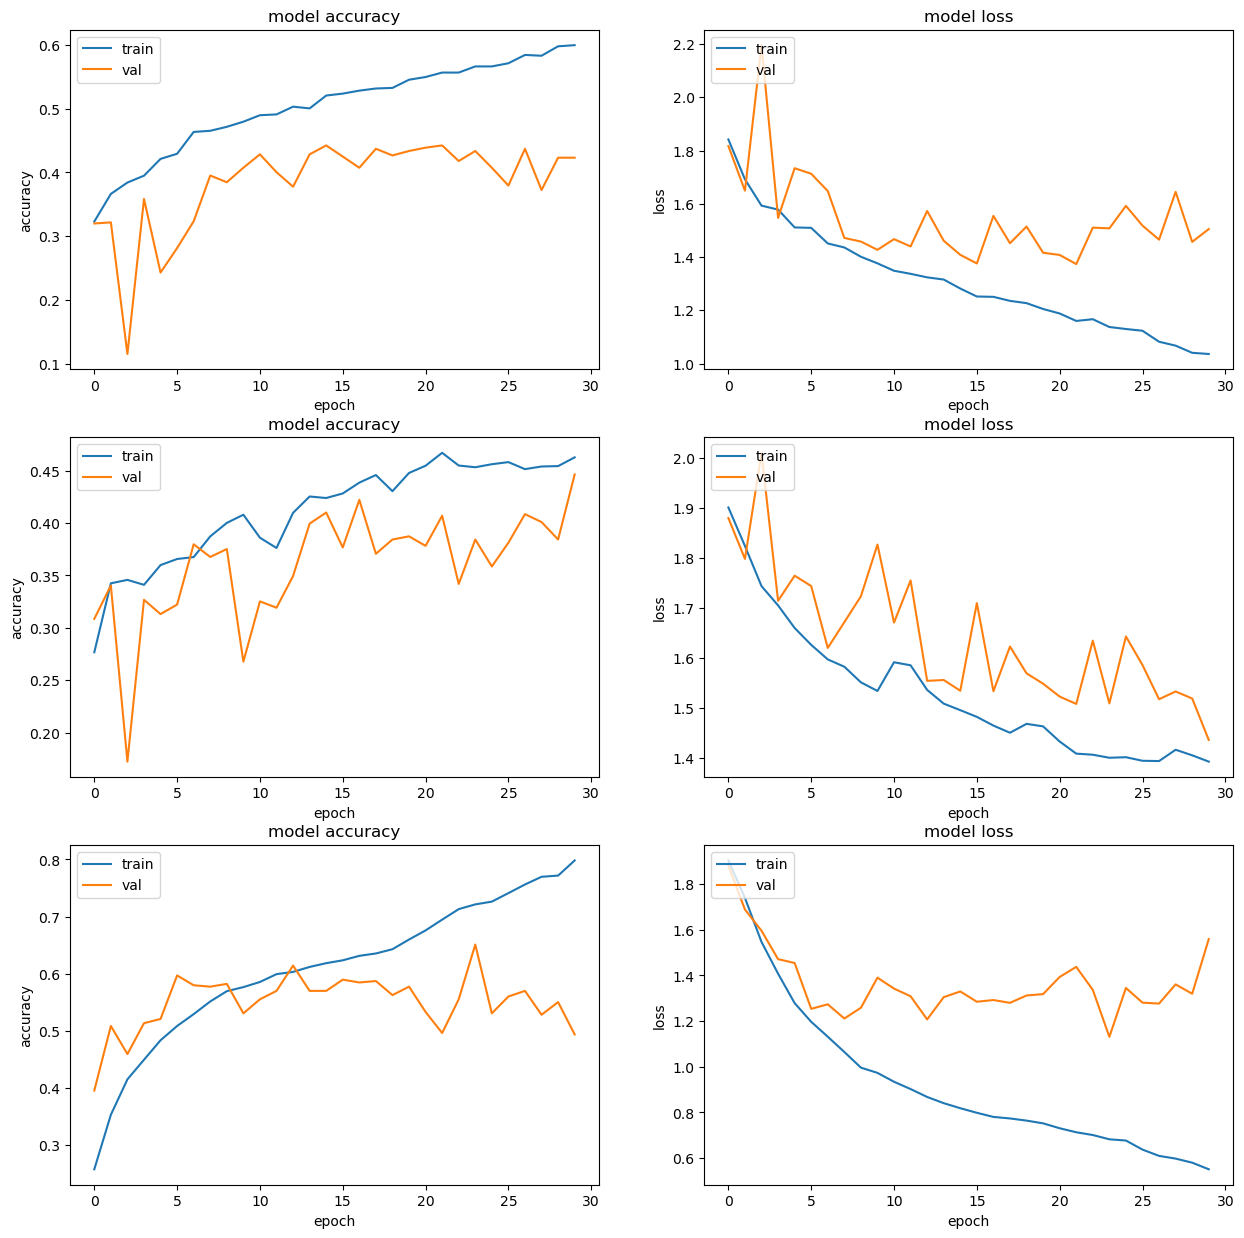

In [108]:
plot_stats(t2)

In [36]:
def get_m14():
    m = Sequential([
            InputLayer(input_shape=(256,256,3)),
            Reshape((16,16,256,3)),
            TimeDistributed(Conv2D(16, kernel_size=(3,3), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),

            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            Bidirectional(LSTM(8, dropout=0.4, return_sequences=True)),
            LSTM(4, return_sequences=False),
            
            Dense(7, activation='softmax')
    ])
    return m

get_m14().summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_32 (Reshape)         (None, 16, 16, 256, 3)    0         
_________________________________________________________________
time_distributed_261 (TimeDi (None, 16, 14, 254, 16)   448       
_________________________________________________________________
time_distributed_262 (TimeDi (None, 16, 14, 254, 16)   64        
_________________________________________________________________
time_distributed_263 (TimeDi (None, 16, 7, 127, 16)    0         
_________________________________________________________________
time_distributed_264 (TimeDi (None, 16, 5, 125, 32)    4640      
_________________________________________________________________
time_distributed_265 (TimeDi (None, 16, 4, 124, 32)    0         
_________________________________________________________________
time_distributed_266 (TimeDi (None, 16, 2, 122, 64)  

In [37]:
ac1_14 = train_avaluate(get_m14, kf1, data["emodb"]["x"], data["emodb"]["y"] )

Epoch 1/30
89/89 [==============================] - 9s 70ms/step - loss: 1.8793 - accuracy: 0.2378 - val_loss: 1.9070 - val_accuracy: 0.2783
Epoch 2/30
89/89 [==============================] - 5s 61ms/step - loss: 1.7533 - accuracy: 0.4097 - val_loss: 1.8034 - val_accuracy: 0.4601
Epoch 3/30
89/89 [==============================] - 5s 56ms/step - loss: 1.5973 - accuracy: 0.4602 - val_loss: 1.6771 - val_accuracy: 0.4657
Epoch 4/30
89/89 [==============================] - 5s 60ms/step - loss: 1.4962 - accuracy: 0.4819 - val_loss: 1.6530 - val_accuracy: 0.4063
Epoch 5/30
89/89 [==============================] - 6s 62ms/step - loss: 1.4118 - accuracy: 0.4973 - val_loss: 1.5113 - val_accuracy: 0.4007
Epoch 6/30
89/89 [==============================] - 6s 63ms/step - loss: 1.3538 - accuracy: 0.5100 - val_loss: 1.4536 - val_accuracy: 0.4230
Epoch 7/30
89/89 [==============================] - 5s 62ms/step - loss: 1.3166 - accuracy: 0.5188 - val_loss: 1.4225 - val_accuracy: 0.4100
Epoch 8/30
89

Epoch 29/30
86/86 [==============================] - 5s 64ms/step - loss: 0.3052 - accuracy: 0.9264 - val_loss: 1.0182 - val_accuracy: 0.6635
Epoch 30/30
86/86 [==============================] - 5s 63ms/step - loss: 0.3330 - accuracy: 0.9140 - val_loss: 1.1139 - val_accuracy: 0.6255
Done
Epoch 1/30
83/83 [==============================] - 10s 78ms/step - loss: 1.9071 - accuracy: 0.2179 - val_loss: 1.8886 - val_accuracy: 0.1929
Epoch 2/30
83/83 [==============================] - 5s 65ms/step - loss: 1.7483 - accuracy: 0.4036 - val_loss: 1.8654 - val_accuracy: 0.2043
Epoch 3/30
83/83 [==============================] - 5s 65ms/step - loss: 1.5960 - accuracy: 0.4047 - val_loss: 1.7521 - val_accuracy: 0.2717
Epoch 4/30
83/83 [==============================] - 5s 66ms/step - loss: 1.4725 - accuracy: 0.4742 - val_loss: 1.7813 - val_accuracy: 0.2409
Epoch 5/30
83/83 [==============================] - 5s 65ms/step - loss: 1.3818 - accuracy: 0.5141 - val_loss: 1.7453 - val_accuracy: 0.2774
Epoch

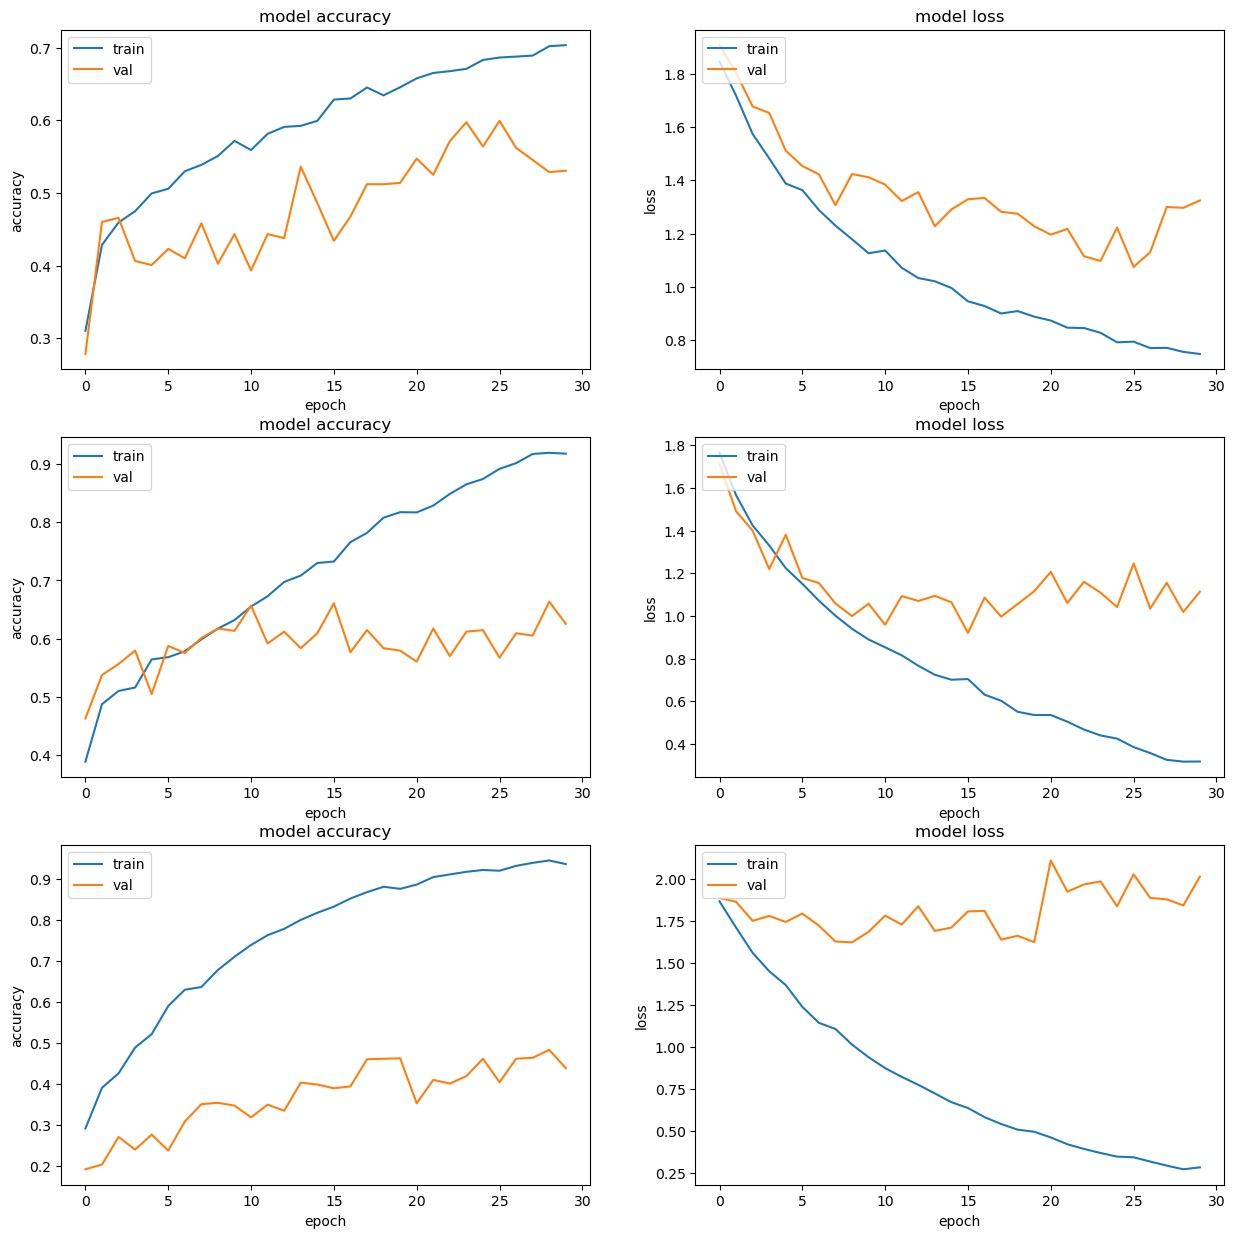

In [38]:
plot_stats(ac1_14)

In [39]:
def train_avaluate2(model_fn, kf, x, y):
    cv_acc = []
    for train_index, val_index in kf:
        m = model_fn()
        m.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')
        # fit & predict
        history = m.fit(x[train_index], y[train_index],
                        batch_size=64,
                        epochs=50,
                        validation_data=(x[val_index], y[val_index]),
                        verbose=1)
        print("Done")
        cv_acc.append(history)
    return cv_acc

In [40]:
ac1_15 = train_avaluate2(get_m13, kf1, data["emodb"]["x"], data["emodb"]["y"] )

Epoch 1/50
89/89 [==============================] - 8s 67ms/step - loss: 1.8489 - accuracy: 0.3102 - val_loss: 1.8787 - val_accuracy: 0.2375
Epoch 2/50
89/89 [==============================] - 5s 59ms/step - loss: 1.7109 - accuracy: 0.4026 - val_loss: 1.8590 - val_accuracy: 0.1688
Epoch 3/50
89/89 [==============================] - 5s 59ms/step - loss: 1.6444 - accuracy: 0.4056 - val_loss: 1.6642 - val_accuracy: 0.4193
Epoch 4/50
89/89 [==============================] - 5s 59ms/step - loss: 1.5767 - accuracy: 0.4086 - val_loss: 1.5181 - val_accuracy: 0.4545
Epoch 5/50
89/89 [==============================] - 5s 59ms/step - loss: 1.5249 - accuracy: 0.4301 - val_loss: 1.4669 - val_accuracy: 0.4286
Epoch 6/50
89/89 [==============================] - 5s 59ms/step - loss: 1.4647 - accuracy: 0.4589 - val_loss: 1.8509 - val_accuracy: 0.1280
Epoch 7/50
89/89 [==============================] - 5s 59ms/step - loss: 1.4425 - accuracy: 0.4772 - val_loss: 1.5928 - val_accuracy: 0.3451
Epoch 8/50
89

Epoch 9/50
86/86 [==============================] - 5s 60ms/step - loss: 1.4447 - accuracy: 0.5082 - val_loss: 1.2828 - val_accuracy: 0.6554
Epoch 10/50
86/86 [==============================] - 5s 60ms/step - loss: 1.3836 - accuracy: 0.5328 - val_loss: 1.3422 - val_accuracy: 0.6309
Epoch 11/50
86/86 [==============================] - 5s 60ms/step - loss: 1.3481 - accuracy: 0.5376 - val_loss: 1.6797 - val_accuracy: 0.3867
Epoch 12/50
86/86 [==============================] - 5s 61ms/step - loss: 1.3180 - accuracy: 0.5393 - val_loss: 1.5341 - val_accuracy: 0.4912
Epoch 13/50
86/86 [==============================] - 5s 61ms/step - loss: 1.3518 - accuracy: 0.5166 - val_loss: 1.5364 - val_accuracy: 0.4057
Epoch 14/50
86/86 [==============================] - 5s 59ms/step - loss: 1.2835 - accuracy: 0.5517 - val_loss: 1.1636 - val_accuracy: 0.6404
Epoch 15/50
86/86 [==============================] - 5s 60ms/step - loss: 1.2367 - accuracy: 0.5694 - val_loss: 1.5542 - val_accuracy: 0.5142
Epoch 1

Epoch 17/50
83/83 [==============================] - 5s 61ms/step - loss: 1.2010 - accuracy: 0.5828 - val_loss: 1.8849 - val_accuracy: 0.2797
Epoch 18/50
83/83 [==============================] - 5s 61ms/step - loss: 1.1928 - accuracy: 0.5756 - val_loss: 1.6491 - val_accuracy: 0.3333
Epoch 19/50
83/83 [==============================] - 5s 61ms/step - loss: 1.1731 - accuracy: 0.5854 - val_loss: 1.8402 - val_accuracy: 0.3356
Epoch 20/50
83/83 [==============================] - 5s 60ms/step - loss: 1.1305 - accuracy: 0.5875 - val_loss: 1.6335 - val_accuracy: 0.3584
Epoch 21/50
83/83 [==============================] - 5s 63ms/step - loss: 1.1070 - accuracy: 0.6040 - val_loss: 1.6075 - val_accuracy: 0.3836
Epoch 22/50
83/83 [==============================] - 5s 62ms/step - loss: 1.0834 - accuracy: 0.6059 - val_loss: 1.4949 - val_accuracy: 0.4247
Epoch 23/50
83/83 [==============================] - 5s 62ms/step - loss: 1.0820 - accuracy: 0.6044 - val_loss: 1.4117 - val_accuracy: 0.4281
Epoch 

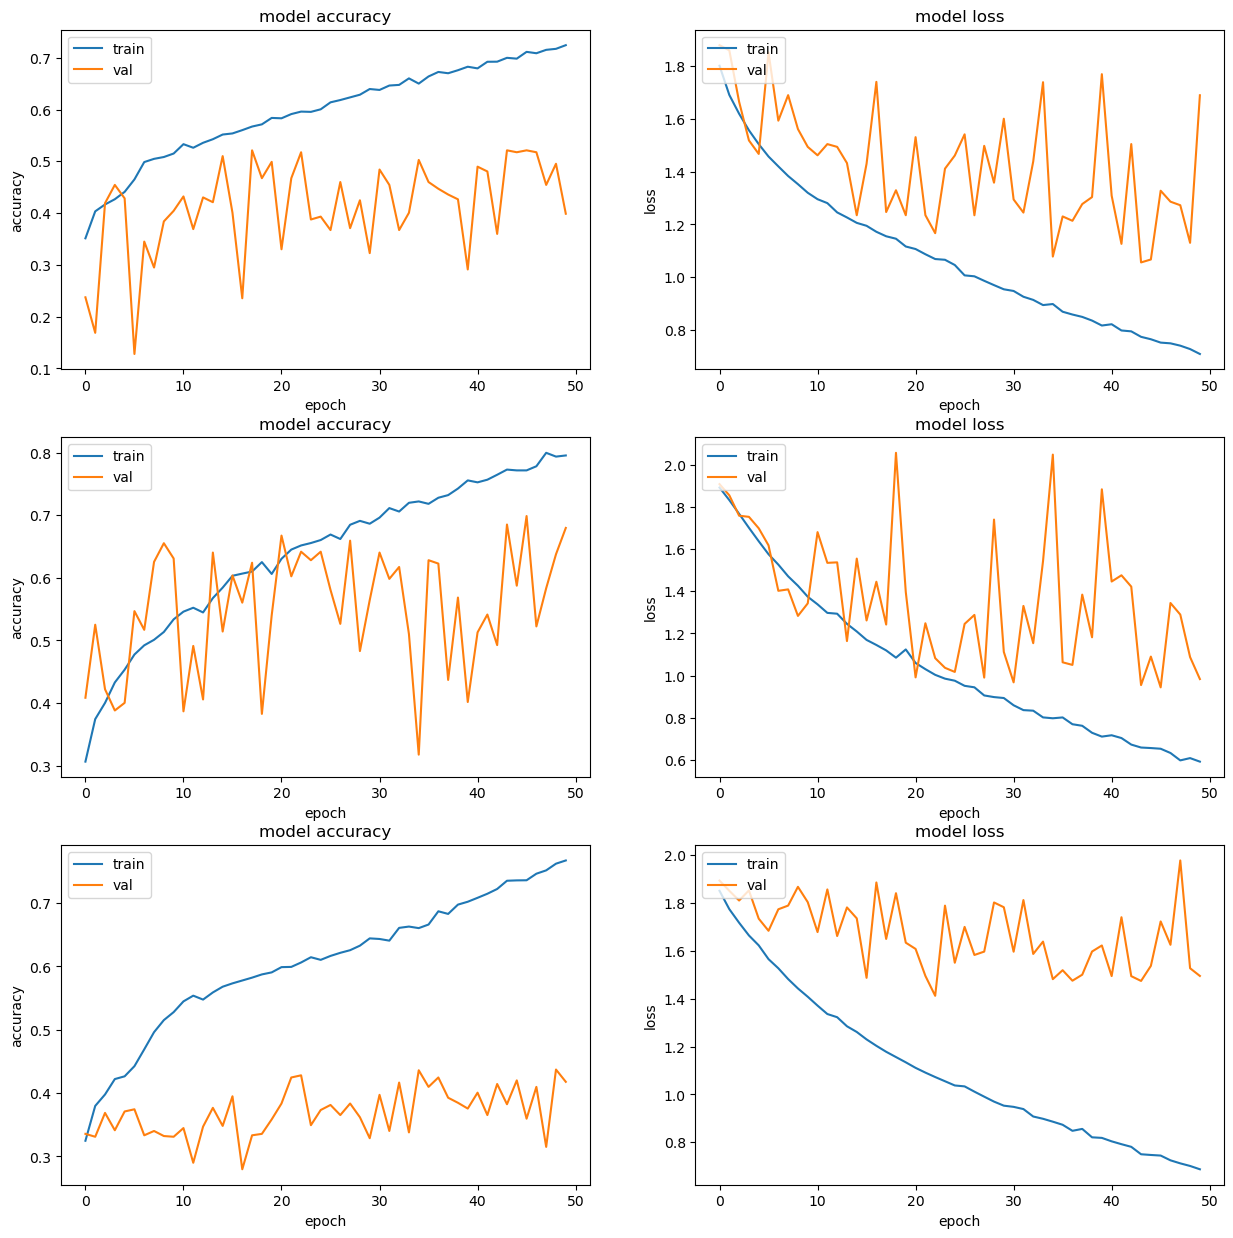

In [41]:
plot_stats(ac1_15)